In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [41]:
facesData = np.loadtxt( 'faces.dat' )
row = 400
pix = 64
col = 64*64

(a) Display the 100th Image


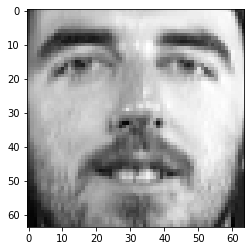

In [42]:
# Reshape the data
data = facesData.reshape(row, col)
print("(a) Display the 100th Image")
image = 100
# rotate and display image
plt.imshow(np.rot90(data[image].reshape(pix, pix),3), cmap="gray")
plt.show()

(b) remove mean and Display the 100th Image


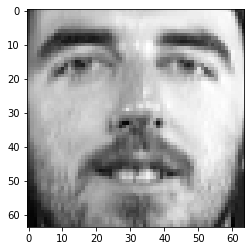

In [43]:
# remove mean from data
mean = data.mean()
center = data - mean
print("(b) remove mean and Display the 100th Image")
# rotate and display image
plt.imshow(np.rot90(center[image].reshape(pix, pix),3), cmap="gray")
plt.show()

(c) sorted eigenvalues


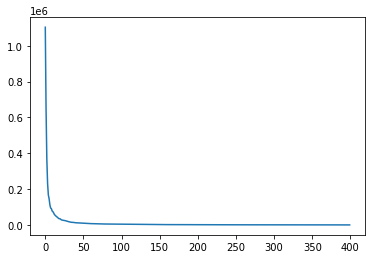

In [44]:
pca = PCA()
pca.fit(center)
# get sorted eigenvalues
eigenValues = pca.explained_variance_
eigenIndex = np.arange(row)
# plot sorted eigen values
print("(c) sorted eigenvalues")
plt.plot(eigenIndex, eigenValues)
plt.show()

In [45]:
lastEigen = eigenValues[row-1]
print("(d) Last Eigenvalue: ", lastEigen)

(d) Last Eigenvalue:  1.831887454910423e-23


Text(0, 0.5, 'variance')

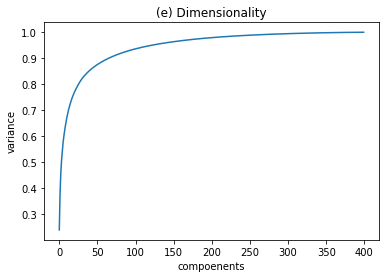

In [46]:
# principle components to keep
eigenSum = sum(eigenValues)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("(e) Dimensionality")
plt.xlabel("compoenents")
plt.ylabel("variance")

(f) leading eigenvectors


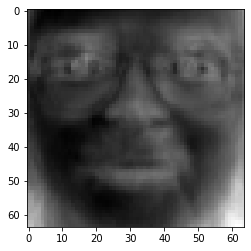

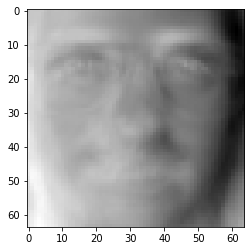

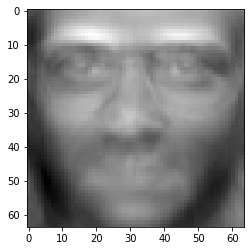

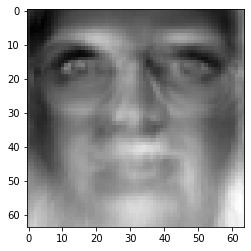

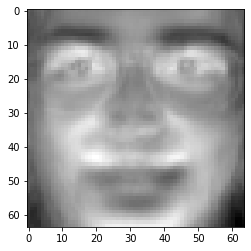

In [47]:
# top 5 leading eigenvectors
print("(f) leading eigenvectors")
components = pca.components_
for i in range(0,5):
    plt.imshow(np.rot90(components[i].reshape(pix, pix),3), cmap="gray")
    plt.show()

displaying reconstructed image with component =  10


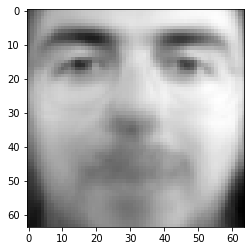

displaying reconstructed image with component =  100


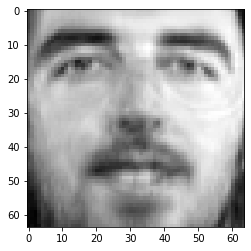

displaying reconstructed image with component =  200


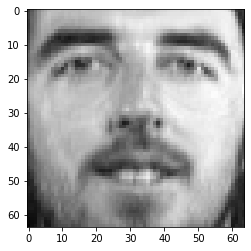

displaying reconstructed image with component =  399


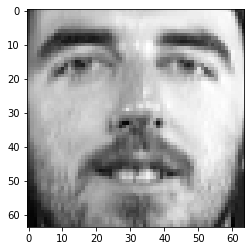

In [48]:
# reconstructed images
principals = [10,100,200,399]
for comp in principals:
    print("displaying reconstructed image with component = ",comp)
    pca = PCA(n_components = comp)
    transform = pca.fit_transform(center)
    inverse = pca.inverse_transform(transform)
    plt.imshow(np.rot90(inverse[image].reshape(pix, pix),3), cmap="gray")
    plt.show()